In [12]:
import numpy as np
from tqdm.notebook import tqdm

In [2]:
def get_epsilon_greedy_action(q_values, epsilon, action_n):
    
    policy = np.ones(action_n) * epsilon / action_n
    max_action = np.argmax(q_values)
    policy[max_action] += 1 - epsilon
    
    return np.random.choice(action_n, p=policy)


# Monte-Carlo algorithm


In [25]:
def MonteCarlo(env, episode_n, trajectory_len=500, gamma=0.99):
    total_rewards = []
    
    state_n = env.observation_space.n
    action_n = env.action_space.n
    qfunction = np.zeros((state_n, action_n))
    counter = np.zeros((state_n, action_n))
    epsilon = 1
    for episode in tqdm(range(episode_n)):
        epsilon = 1 - episode / episode_n
        trajectory = {'states': [], 'actions': [], 'rewards': []}
        state = env.reset()
        for _ in range(trajectory_len):
            
            action = get_epsilon_greedy_action(qfunction[state], epsilon, action_n)
            
            trajectory['states'].append(state)
            trajectory['actions'].append(action)
            
            state, reward, done, _ = env.step(action)
            
            trajectory['rewards'].append(reward)
            if done:
                break
                
        total_rewards.append(sum(trajectory['rewards']))        
        real_trajectory_len = len(trajectory['rewards'])
        returns = np.zeros(real_trajectory_len + 1)
        for t in range(real_trajectory_len - 1, -1, -1):
            returns[t] = trajectory['rewards'][t] + gamma * returns[t + 1]
        
        for t in range(real_trajectory_len):
            state = trajectory['states'][t]
            action = trajectory['actions'][t]
            qfunction[state][action] = (returns[t] - qfunction[state][action]) / (1 + counter[state][action])
            counter[state][action] += 1
            
    return total_rewards

# Solving Taxi-v3 by means of MonteCarlo

  0%|          | 0/500 [00:00<?, ?it/s]

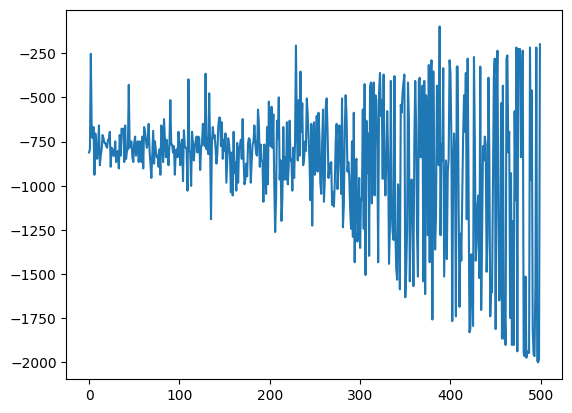

In [26]:
import gym
import matplotlib.pyplot as plt

env = gym.make('Taxi-v3')

total_rewards = MonteCarlo(env, episode_n=500, trajectory_len=1000, gamma=0.99)

plt.plot(total_rewards)
plt.show()

# SARSA algorithm

In [20]:
def SARSA(env, episode_n, gamma=0.99, trajectory_len=500, alpha=0.5):
    total_rewards = np.zeros(episode_n)
    
    state_n = env.observation_space.n
    action_n = env.action_space.n
    qfunction = np.zeros((state_n, action_n))
    epsilon = 1
    for episode in tqdm(range(episode_n)):
        
        epsilon = 1 / (episode + 1)
        
        state = env.reset()
        
        action = get_epsilon_greedy_action(qfunction[state], epsilon, action_n)
        
        for _ in range(trajectory_len):
            
            next_state, reward, done, _ = env.step(action)
            next_action = get_epsilon_greedy_action(qfunction[next_state], epsilon, action_n)
            
            
            #qfunction update
            qfunction[state][action] += alpha * (reward + gamma * qfunction[next_state][next_action] - qfunction[state][action])
            
            
            state = next_state
            action = next_action
            total_rewards[episode] += reward
            if done:
                break
                
    return total_rewards

  0%|          | 0/500 [00:00<?, ?it/s]

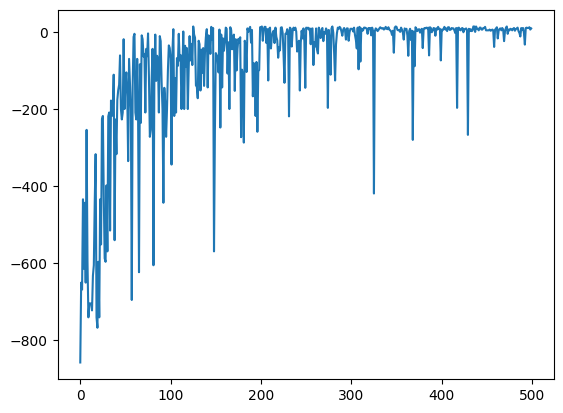

In [21]:
total_rewards = SARSA(env, episode_n=500, gamma=0.99, trajectory_len=1000, alpha=0.5)

plt.plot(total_rewards)
plt.show()

# Q-learning algorithm

In [ ]:
def QLearning(env, episode_n, noisy_episode_n, gamma=0.99, )